# 🌍 Global Population Overview
### An introductory analysis notebook for GlobalPopScope — retrieving and visualizing population data across countries.


## 1. Setup & Imports ```python
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
%pip install requests pandas matplotlib seaborn

In [8]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Fetch Data from World Bank API

In [9]:
url = "http://api.worldbank.org/v2/country/all/indicator/SP.POP.TOTL"
params = {
    "format": "json",
    "date": "2000:2023",
    "per_page": "20000"
}

response = requests.get(url, params=params)
data = response.json()[1]
df = pd.DataFrame(data)


# Cleaning and Reformatting

In [10]:
# Cleaning and Reformatting
df_clean = df[['country', 'countryiso3code', 'date', 'value']]
df_clean.columns = ['Country', 'ISO3', 'Year', 'Population']
df_clean = df_clean.dropna()
df_clean['Year'] = df_clean['Year'].astype(int)



# Exploring and Visualizing

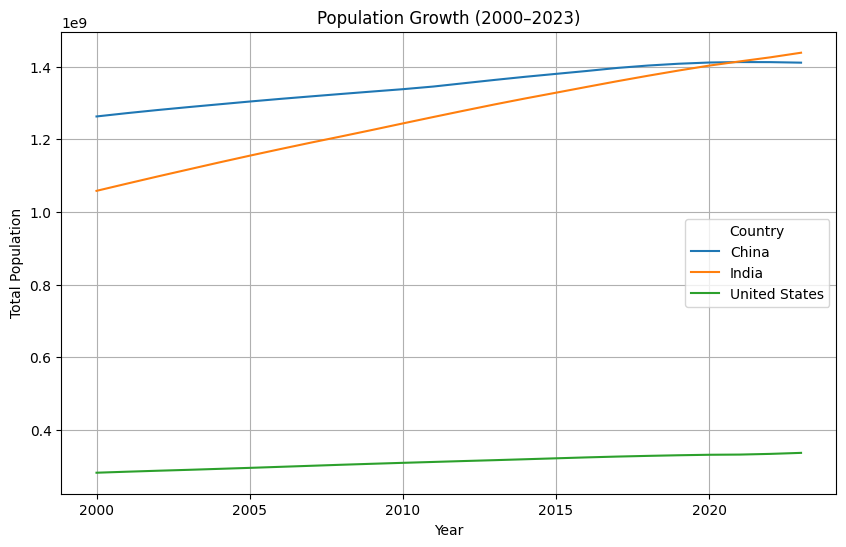

In [15]:
top_countries = ['IND', 'CHN', 'USA']
subset = df_clean[df_clean['ISO3'].isin(top_countries)].copy()

# Extract country name from dictionary
subset['CountryName'] = subset['Country'].apply(lambda x: x['value'] if isinstance(x, dict) and 'value' in x else str(x))

plt.figure(figsize=(10, 6))
sns.lineplot(data=subset, x='Year', y='Population', hue='CountryName')
plt.title("Population Growth (2000–2023)")
plt.ylabel("Total Population")
plt.grid(True)
plt.legend(title='Country')
plt.show()


# Insights
China's growth is flattening — is this the impact of aging population or policy?

India's trajectory is still upward — what does this mean for resource planning?

USA shows steady growth — but are subnational trends telling a different story?

---

We can dive right into fetching real data with features we can choose — region, demographic, or year range.

# 1️⃣ Add Age-Sex Breakdown via UN WPP API
To access detailed age-sex population data from the UN World Population Prospects (WPP):

🔧 Use the wpp2022 R Package
Install it from GitHub:
install.packages("devtools")
devtools::install_github("PPgp/wpp2022")
library(wpp2022)

In [18]:
# If you want to run R code in a Python notebook, use the %%R magic
# First, install rpy2 if not already installed
# %pip install rpy2   # Already installed in cell 2

# Then, use the following cell magic to run R code